In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv(r"C:\Users\STRADIGI\Downloads\Rainfall.csv")   # if file name is Rainfall.csv
print(df.shape)
df.head()

(366, 12)


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


# DATA PREPARATION

In [4]:
# Check columns + missing values
print(df.columns)
print(df.isnull().sum())

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')
day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64


In [7]:
# remove extra  spaces in all columns
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [11]:
df = df.drop(columns=["day"])

In [12]:
df["rainfall"] = df["rainfall"].map({"yes": 1, "no": 0})
df["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [14]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


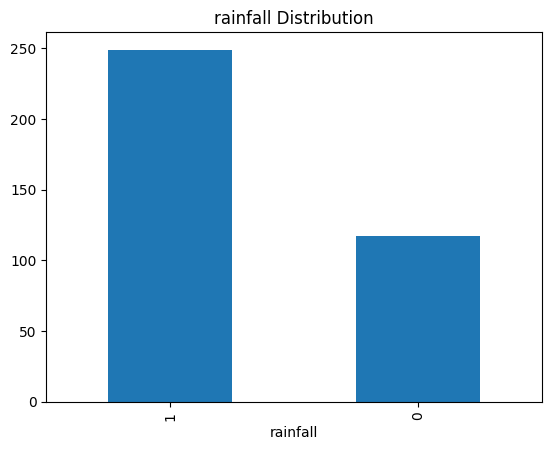

In [15]:
df["rainfall"].value_counts().plot(kind="bar")
plt.title("rainfall Distribution")
plt.show()

In [18]:
# Humidity vs Rainfall
df.groupby("rainfall")["humidity"].mean()

rainfall
0    73.000000
1    83.550201
Name: humidity, dtype: float64

In [20]:
# Sunshine vs Rainfall
df.groupby("rainfall")["sunshine"].mean()

rainfall
0    7.586325
1    2.931325
Name: sunshine, dtype: float64

In [22]:
# Cloud vs Rainfall
df.groupby("rainfall")["cloud"].mean()

rainfall
0    51.256410
1    80.465863
Name: cloud, dtype: float64

Rainfall days → humidity & cloud high ✅

Rainfall days → sunshine low ✅

In [25]:
X = df.drop("rainfall", axis=1)
y = df["rainfall"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)

(292, 10) (74, 10)


In [26]:
print(X_train.shape, X_test.shape)

(292, 10) (74, 10)


# Train Model (Simple RandomForest)

In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predictions + Evaluation

In [29]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8108108108108109

Confusion Matrix:
 [[14 10]
 [ 4 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.58      0.67        24
           1       0.82      0.92      0.87        50

    accuracy                           0.81        74
   macro avg       0.80      0.75      0.77        74
weighted avg       0.81      0.81      0.80        74



# prediction

In [42]:
X.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [43]:
new_data = pd.DataFrame([{
    "pressure": 1010.2,
    "maxtemp": 32.5,
    "mintemp": 24.1,
    "temparature": 28.0,   # ✅ use this spelling
    "dewpoint": 23.4,
    "humidity": 85,
    "cloud": 7,
    "sunshine": 2.5,
    "winddirection": 180,
    "windspeed": 12.0
}])


In [44]:
new_data = new_data[X.columns]

In [45]:
new_data

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1010.2,32.5,28.0,24.1,23.4,85,7,2.5,180,12.0


In [46]:
pred = model.predict(new_data)

In [48]:
print("✅ Rainfall YES 🌧️" if pred[0] == 1 else "✅ Rainfall NO ☀️")

✅ Rainfall NO ☀️


In [49]:
new_data_yes = pd.DataFrame([{
    "pressure": 1003.5,
    "maxtemp": 28.0,
    "mintemp": 23.5,
    "temparature": 25.5,
    "dewpoint": 24.0,
    "humidity": 95,
    "cloud": 9,
    "sunshine": 0.2,
    "winddirection": 200,
    "windspeed": 20.0
}])

In [51]:
# keep same column order as training
new_data_yes = new_data_yes[X.columns]

In [52]:
pred = model.predict(new_data_yes)

In [53]:
print("✅ Rainfall YES 🌧️" if pred[0] == 1 else "✅ Rainfall NO ☀️")

✅ Rainfall YES 🌧️


# Save Model using Pickle

In [54]:
import pickle

In [56]:
# Save model
with open("rainfall_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [57]:
# Save feature column names (important for order)
with open("feature_columns.pkl", "wb") as file:
    pickle.dump(X.columns.tolist(), file)